# Loan Status Prediction

The purpose of this project is to predict whether a loan will be approved based on the demographics of the person requesting the loan.

Loading packages:

In [133]:
library(tidyverse)
library(ggplot2)
library(caret)
library(e1071)

options(repos='https://cran.cnr.berkeley.edu/')
install.packages('klaR')
install.packages('kknn')
install.packages('gbm')
library(klaR)
library(kknn)
library(gbm)

Warning message:
"package 'klaR' is in use and will not be installed"Warning message:
"package 'kknn' is in use and will not be installed"Warning message:
"package 'gbm' is in use and will not be installed"

## Data Exploration

Load data set

In [134]:
df <- read.csv('C:/Datasets/LoanTrain.csv',na.strings='')
df

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


Check for duplicate rows

In [135]:
sum(duplicated(df))

[1] 0

Summarize data

In [136]:
summary(df)

     Loan_ID       Gender    Married    Dependents        Education  
 LP001002:  1   Female:112   No  :213   0   :345   Graduate    :480  
 LP001003:  1   Male  :489   Yes :398   1   :102   Not Graduate:134  
 LP001005:  1   NA's  : 13   NA's:  3   2   :101                     
 LP001006:  1                           3+  : 51                     
 LP001008:  1                           NA's: 15                     
 LP001011:  1                                                        
 (Other) :608                                                        
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :500      Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes : 82      1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 NA's: 32      Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     M

Convert Credit_History and Loan_Status to factor.

In [137]:
df$Credit_History<-as.factor(df$Credit_History)
summary(df)

     Loan_ID       Gender    Married    Dependents        Education  
 LP001002:  1   Female:112   No  :213   0   :345   Graduate    :480  
 LP001003:  1   Male  :489   Yes :398   1   :102   Not Graduate:134  
 LP001005:  1   NA's  : 13   NA's:  3   2   :101                     
 LP001006:  1                           3+  : 51                     
 LP001008:  1                           NA's: 15                     
 LP001011:  1                                                        
 (Other) :608                                                        
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :500      Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes : 82      1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 NA's: 32      Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     M

In [138]:
nearZeroVar(df, saveMetrics=TRUE)

,freqRatio,percentUnique,zeroVar,nzv
Loan_ID,1.000000,100.0000000,FALSE,FALSE
Gender,4.366071,0.3257329,FALSE,FALSE
Married,1.868545,0.3257329,FALSE,FALSE
Dependents,3.382353,0.6514658,FALSE,FALSE
Education,3.582090,0.3257329,FALSE,FALSE
Self_Employed,6.097561,0.3257329,FALSE,FALSE
ApplicantIncome,1.500000,82.2475570,FALSE,FALSE
CoapplicantIncome,54.600000,46.7426710,FALSE,FALSE
LoanAmount,1.176471,33.0618893,FALSE,FALSE
Loan_Amount_Term,11.636364,1.6286645,FALSE,FALSE


Based on the summary above, some factors levels are unbalanced. However, it is not so unbalanced as to warrant exclusion of any factor. 

Next, check for outliers in continuous features

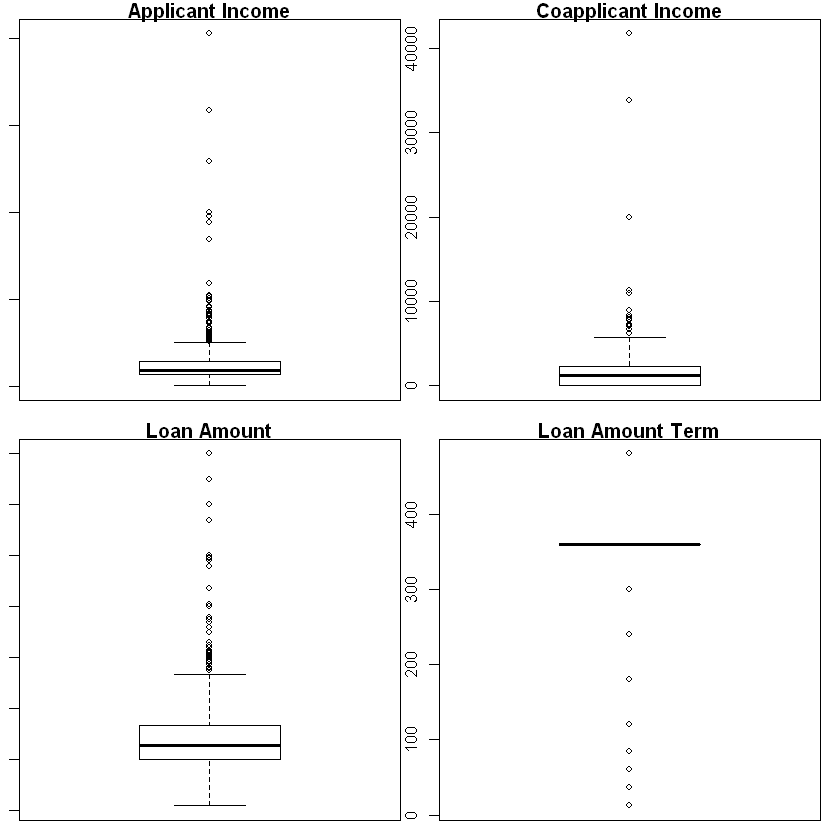

In [139]:
par(mfrow=c(2,2), mar=c(1,1,1,1))
boxplot(df$ApplicantIncome,main='Applicant Income')
boxplot(df$CoapplicantIncome, main = 'Coapplicant Income')
boxplot(df$LoanAmount, main = 'Loan Amount')
boxplot(df$Loan_Amount_Term, main = 'Loan Amount Term')

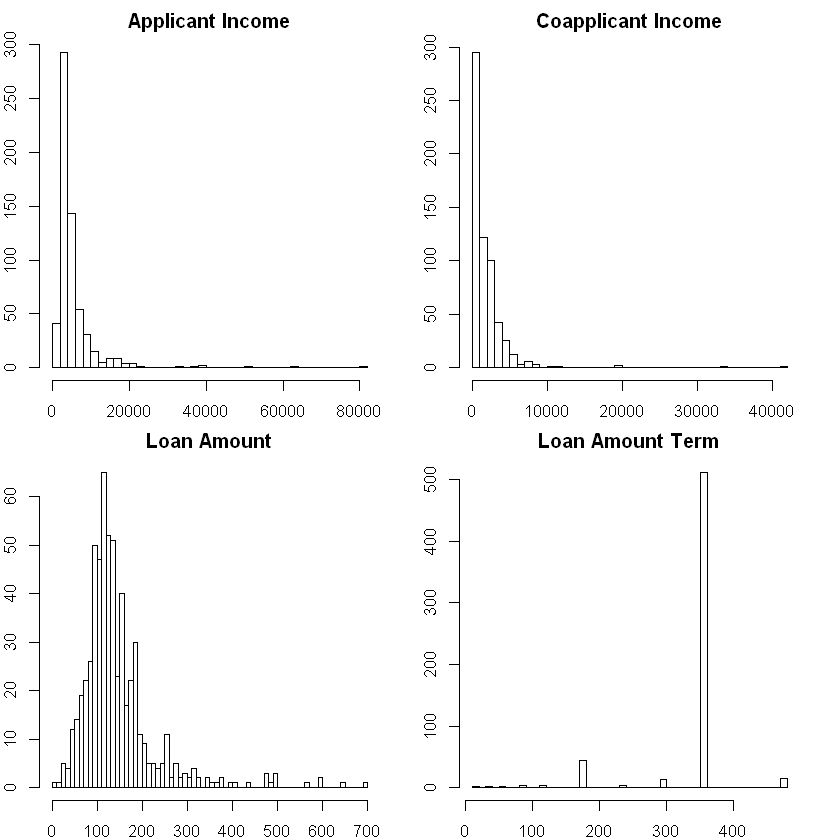

In [140]:
par(mfrow=c(2,2), mar=c(2,2,2,2))
hist(df$ApplicantIncome,main='Applicant Income',breaks=50)
hist(df$CoapplicantIncome, main = 'Coapplicant Income',breaks=50)
hist(df$LoanAmount, main = 'Loan Amount',breaks=50)
hist(df$Loan_Amount_Term, main = 'Loan Amount Term',breaks=50)

For applicant income, co-applicant income, and loan amount, there are many extreme values. However the histograms show a skewed possibly log-normal distribution consistent with having a lower bound of 0 on possible values for these features. The extreme values are expected at the tail of such distributions, and thus data points will be excluded based on value of these features. Loan Amount Term appears to be 1 year (360 days) for almost all data points, suggesting that the data was entered in years most of the time. Because of this, it cannot be determined if the extreme values are actually out of the ordinary or not, therefore no data points will be excluded based on loan amount term.

Next, check for correlations.

In [141]:
cor(df[7:10], use='complete.obs')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.00000000,-0.11363997,0.57129807,-0.04734816
CoapplicantIncome,-0.11363997,1.00000000,0.18885511,-0.05979733
LoanAmount,0.57129807,0.18885511,1.00000000,0.03944725
Loan_Amount_Term,-0.04734816,-0.05979733,0.03944725,1.00000000


In [142]:
chisqfun <- function(a,b){
    if(a==b) return(0)
    else return(round(chisq.test(table(df[,a],df[,b]))$p.value,2))
}
matrix(mapply(chisqfun,rep(c(2:6,11:12),7),rep(c(2:6,11:12),rep(7,7))),7,7,dimnames=list(names(df[c(2:6,11:12)]),names(df[c(2:6,11:12)])))

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
Gender,0.00,0.00,0.00,0.28,0.94,0.82,0.02
Married,0.00,0.00,0.00,0.80,1.00,1.00,0.99
Dependents,0.00,0.00,0.00,0.47,0.10,0.48,0.31
Education,0.28,0.80,0.47,0.00,0.88,0.07,0.16
Self_Employed,0.94,1.00,0.10,0.88,0.00,1.00,0.75
Credit_History,0.82,1.00,0.48,0.07,1.00,0.00,0.60
Property_Area,0.02,0.99,0.31,0.16,0.75,0.60,0.00


None of the continuous variables are strongly correlated with each other, though loan amount is moderately correlated with income. The only factors that are not independent are gender, marital status, and dependents.

A count table for these 3 variables is then generated.

In [143]:
table(df[,2],df[,3],df[,4])

, ,  = 0

        
          No Yes
  Female  60  20
  Male   109 149

, ,  = 1

        
          No Yes
  Female  13   6
  Male    10  72

, ,  = 2

        
          No Yes
  Female   2   5
  Male     6  86

, ,  = 3+

        
          No Yes
  Female   3   0
  Male     3  42


Though the distribution is heavily skewed, all combinations of the 3 levels are represented except married females with 3+ dependents. Therefore, none of these three factors will be dropped at this time.

The imbalance comes apparently from the fact that all members of a family are considered dependents of the father rather than the mother. In addition, from this data set husbands seem to manage finances more than wives, which is why the count of married females is much lower than the count of unmarried females, who manage their own finances.

## Data Visualization

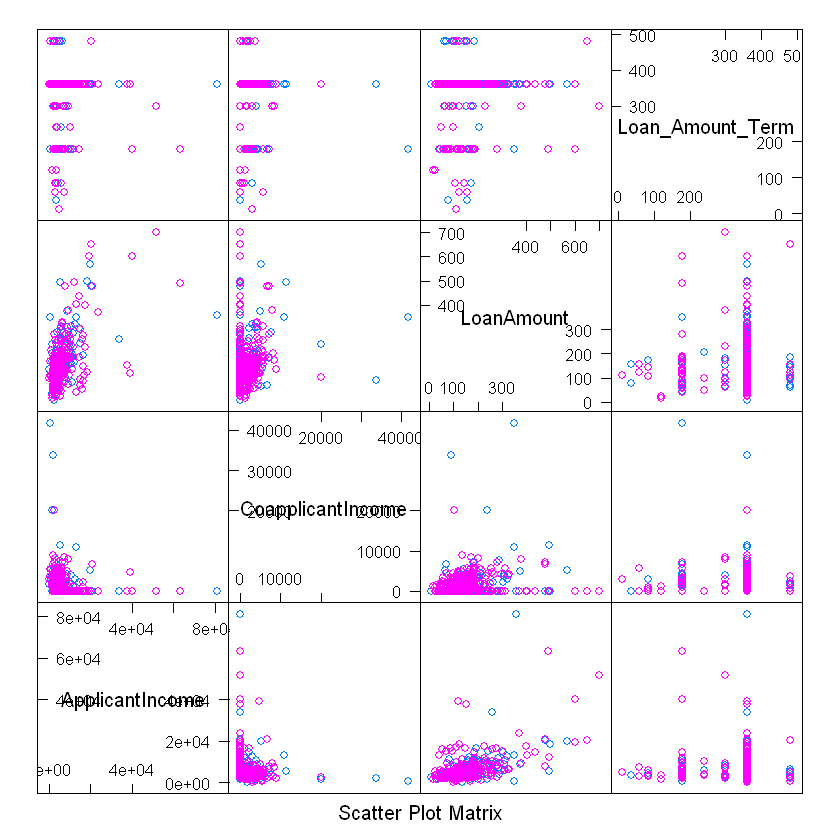

In [144]:
featurePlot(df[,7:10],df[,13],plot='pairs')

Bar plots of % of loans approved:

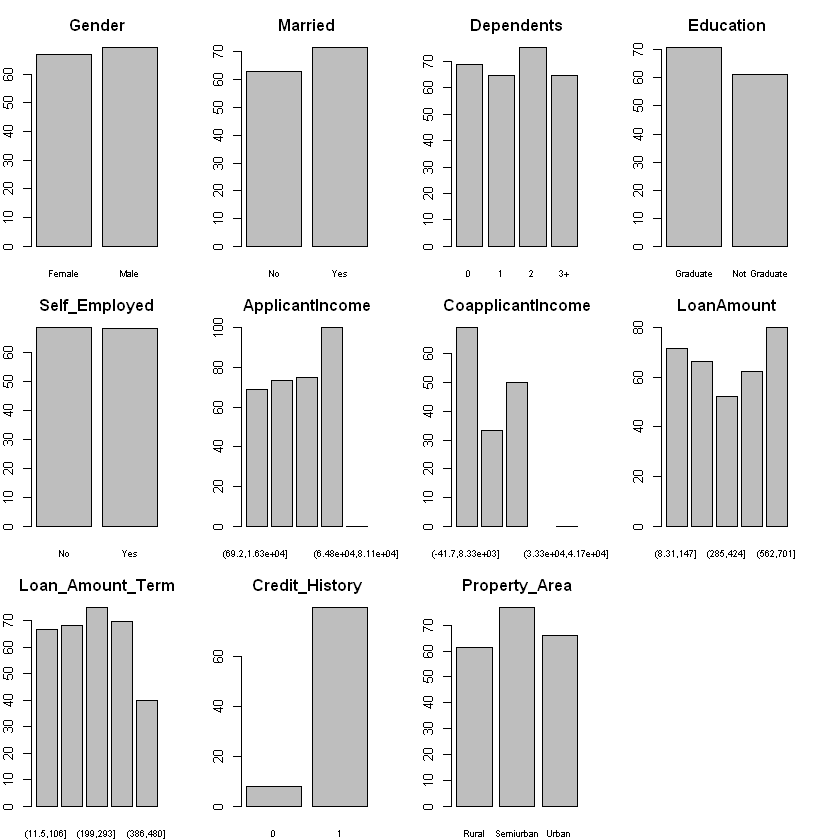

In [145]:
par(mfrow=c(3,4),mar=c(2,2,3,3))
for(i in 2:12){
    if(i %in% c(2:6,11:12)) {
        barplot(table(df[df[,13]=='Y',i])/table(df[,i])*100,beside=TRUE,main=names(df[i]),cex.names=0.7,ylab='% Paid')
    } else {
        cutdf <- df
        cutdf$cutdf <-cut(df[,i],5)
        barplot(table(cutdf[cutdf[,13]=='Y',14])/table(cutdf[,14])*100,beside=TRUE,main=names(df[i]),cex.names=0.7,ylab='% Paid')
    }      
}

There is no clear grouping of the loan status based on any pairs of continuous features. For categorical features, credit history seems to have a large effect on the loan status.

## Pre-Processing

Next, create dummy variables and perform pre-processing.

In [146]:
createdummy <- function(olddf){
    dummies <- as.data.frame(predict(dummyVars(Loan_Status~.,df[,c(2:6,11:13)]),olddf[,c(2:6,11:13)]))
    newdf <- olddf[,c(7:10)]
    newdf$Male <- dummies$Gender.Male
    newdf$Marital <- dummies$Married.Yes
    newdf$Dependents.0 <- dummies$Dependents.0
    newdf$Dependents.1 <- dummies$Dependents.1
    newdf$Dependents.2 <- dummies$Dependents.2
    newdf$Graduate <- dummies$Education.Graduate
    newdf$SelfEmployed <- dummies$Self_Employed.Yes
    newdf$CreditHistory <- dummies$Credit_History.1
    newdf$Rural <- dummies$Property_Area.Rural
    newdf$Urban <- dummies$Property_Area.Urban
    return(newdf)
}

X = createdummy(df)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Loan_Status' is not a factor"

In [147]:
processparameters <-preProcess(X,method =c('scale','bagImpute'))
preprocessedX <-predict(processparameters,X)
preprocessedX

ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Marital,Dependents.0,Dependents.1,Dependents.2,Graduate,SelfEmployed,CreditHistory,Rural,Urban
0.9574333,0.0000000,1.7251291,5.528221,2.565957,0.000000,2.021797,0.000000,0.000000,2.419031,0.0000000,2.740640,0.000000,2.126621
0.7501995,0.5153356,1.4955485,5.528221,2.565957,2.096786,0.000000,2.658188,0.000000,2.419031,0.0000000,2.740640,2.198585,0.000000
0.4910754,0.0000000,0.7711422,5.528221,2.565957,2.096786,2.021797,0.000000,0.000000,2.419031,2.8718227,2.740640,0.000000,2.126621
0.4228159,0.8058099,1.4020768,5.528221,2.565957,2.096786,2.021797,0.000000,0.000000,0.000000,0.0000000,2.740640,0.000000,2.126621
0.9821508,0.0000000,1.6474402,5.528221,2.565957,0.000000,2.021797,0.000000,0.000000,2.419031,0.0000000,2.740640,0.000000,2.126621
0.8867185,1.4339179,3.1196208,5.528221,2.565957,2.096786,0.000000,0.000000,2.668632,2.419031,2.8718227,2.740640,0.000000,2.126621
0.3818930,0.5180695,1.1099774,5.528221,2.565957,2.096786,2.021797,0.000000,0.000000,0.000000,0.0000000,2.740640,0.000000,2.126621
0.4969683,0.8557032,1.8460677,5.528221,2.565957,2.096786,0.000000,0.000000,0.000000,2.419031,0.0000000,0.000000,0.000000,0.000000
0.6557493,0.5214868,1.9629075,5.528221,2.565957,2.096786,0.000000,0.000000,2.668632,2.419031,0.0000000,2.740640,0.000000,2.126621
2.1019663,3.7481439,4.0777066,5.528221,2.565957,2.096786,0.000000,2.658188,0.000000,2.419031,0.0000000,2.740640,0.000000,0.000000


## Model Selection

Different models will be trained. 

__Linear Discriminant Analysis__

In [222]:
lda<-train(preprocessedX, df[,13],method='lda',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
lda

Linear Discriminant Analysis 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 492, 491, 491, 491, ... 
Resampling results:

  Accuracy   Kappa   
  0.8083902  0.481057


__Logistic Regression__

In [149]:
logistic<-train(preprocessedX, df[,13],method='multinom',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
logistic

# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 215.988439
iter  20 value 210.429277
final  value 210.429223 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 216.378379
iter  20 value 210.980643
final  value 210.980470 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 215.988839
iter  20 value 210.429883
final  value 210.429828 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 222.048433
iter  20 value 219.163299
final  value 219.163027 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 222.401477
iter  20 value 219.545569
final  value 219.545229 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 222.048789
iter  20 value 219.163711
final  value 219.163439 
converged
# weights:  16 (15 variable)
initial  value 340.335266 
iter  10 value 235.926487
iter  20 value 230.999721
final  value 230.999420 
converged

Penalized Multinomial Regression 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 491, 492, 491, 492, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.8007800  0.4646392
  1e-04  0.8007800  0.4646392
  1e-01  0.8013221  0.4657627

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.1.

__Support Vector Machine__

In [150]:
SVMLin<-train(preprocessedX, df[,13],method='svmLinear',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
SVMLin

Support Vector Machines with Linear Kernel 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 492, 491, 492, 490, 491, 491, ... 
Resampling results:

  Accuracy   Kappa    
  0.8094905  0.4797852

Tuning parameter 'C' was held constant at a value of 1

In [151]:
SVMRad<-train(preprocessedX, df[,13],method='svmRadial',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
SVMRad

Support Vector Machines with Radial Basis Function Kernel 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 491, 492, 491, 492, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8072400  0.4705199
  0.50  0.8088661  0.4758871
  1.00  0.8072400  0.4747079

Tuning parameter 'sigma' was held constant at a value of 0.06199227
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.06199227 and C = 0.5.

__k Nearest Neighbors__

In [152]:
kNN<-train(preprocessedX, df[,13],method='knn',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
kNN

k-Nearest Neighbors 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 491, 492, 491, 491, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7839600  0.4198568
  7  0.7850175  0.4120866
  9  0.7850264  0.4088475

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [153]:
kkNN<-train(preprocessedX, df[,13],method='kknn',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
kkNN

k-Nearest Neighbors 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 492, 491, 492, 490, 492, ... 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  5     0.7579762  0.3902270
  7     0.7731707  0.4101879
  9     0.7818520  0.4244742

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 9, distance = 2 and kernel
 = optimal.

__Naive Bayes__

In [154]:
nb<-train(preprocessedX, df[,13],method='nb',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
nb

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 43"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 15"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 17"Warning message in FUN(X[[

Naive Bayes 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 492, 491, 491, 492, 490, 492, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa     
  FALSE      0.7915134  0.44943975
   TRUE      0.7024625  0.08540328

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.

__Decision Tree__

In [155]:
tree<-train(preprocessedX, df[,13],method='rpart',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
tree

CART 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 492, 490, 492, 491, 491, 491, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.005208333  0.7621580  0.3964007
  0.007812500  0.7811948  0.4296773
  0.395833333  0.7324045  0.1880315

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0078125.

__Random Forest__

In [156]:
rf<-train(preprocessedX, df[,13],method='rf',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
rf

Random Forest 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 491, 491, 492, 492, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8110690  0.4892170
   8    0.7882649  0.4507972
  14    0.7801302  0.4349723

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

__Gradient Boosted Trees__

In [157]:
gbm<-train(preprocessedX, df[,13],method='gbm',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
gbm

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1900             nan     0.1000    0.0240
     2        1.1524             nan     0.1000    0.0188
     3        1.1223             nan     0.1000    0.0134
     4        1.0979             nan     0.1000    0.0107
     5        1.0805             nan     0.1000    0.0100
     6        1.0660             nan     0.1000    0.0084
     7        1.0502             nan     0.1000    0.0057
     8        1.0384             nan     0.1000    0.0048
     9        1.0306             nan     0.1000    0.0040
    10        1.0231             nan     0.1000    0.0030
    20        0.9884             nan     0.1000   -0.0001
    40        0.9533             nan     0.1000    0.0004
    60        0.9332             nan     0.1000   -0.0011
    80        0.9158             nan     0.1000   -0.0008
   100        0.9005             nan     0.1000   -0.0007
   120        0.8894             nan     0.1000   -0.0005
   140        

Stochastic Gradient Boosting 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 492, 491, 490, 492, 491, 491, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.8073558  0.4771215
  1                  100      0.8095327  0.4832626
  1                  150      0.8068401  0.4797073
  2                   50      0.8089863  0.4807597
  2                  100      0.8008250  0.4671640
  2                  150      0.7861418  0.4408175
  3                   50      0.8030021  0.4702420
  3                  100      0.7942986  0.4607435
  3                  150      0.7867016  0.4498793

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used 

## Model Performance

The best performing algorithms were linear discriminant analysis, linear support vector machine, random forest, and gradient boosted trees.

First, the LDA model will be examined and improved.

In [158]:
lda$finalModel

Call:
lda(x, y)

Prior probabilities of groups:
        N         Y 
0.3127036 0.6872964 

Group means:
  ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term     Male
N       0.8914783         0.6417115   1.762903         5.276322 2.062734
Y       0.8813279         0.5141451   1.685500         5.238056 2.099051
   Marital Dependents.0 Dependents.1 Dependents.2 Graduate SelfEmployed
N 1.234046     1.175798    0.4984103    0.3474781 1.763877    0.4167675
Y 1.426332     1.177636    0.4157356    0.4806067 1.948982    0.3959870
  CreditHistory     Rural     Urban
N      1.540925 0.7901165 0.7642545
Y      2.652009 0.5730909 0.6702384

Coefficients of linear discriminants:
                            LD1
ApplicantIncome    0.0377631380
CoapplicantIncome -0.1035320497
LoanAmount        -0.0957850594
Loan_Amount_Term  -0.0523607171
Male              -0.0189169539
Marital            0.2056612969
Dependents.0       0.0099260027
Dependents.1      -0.1077564446
Dependents.2       0.05902

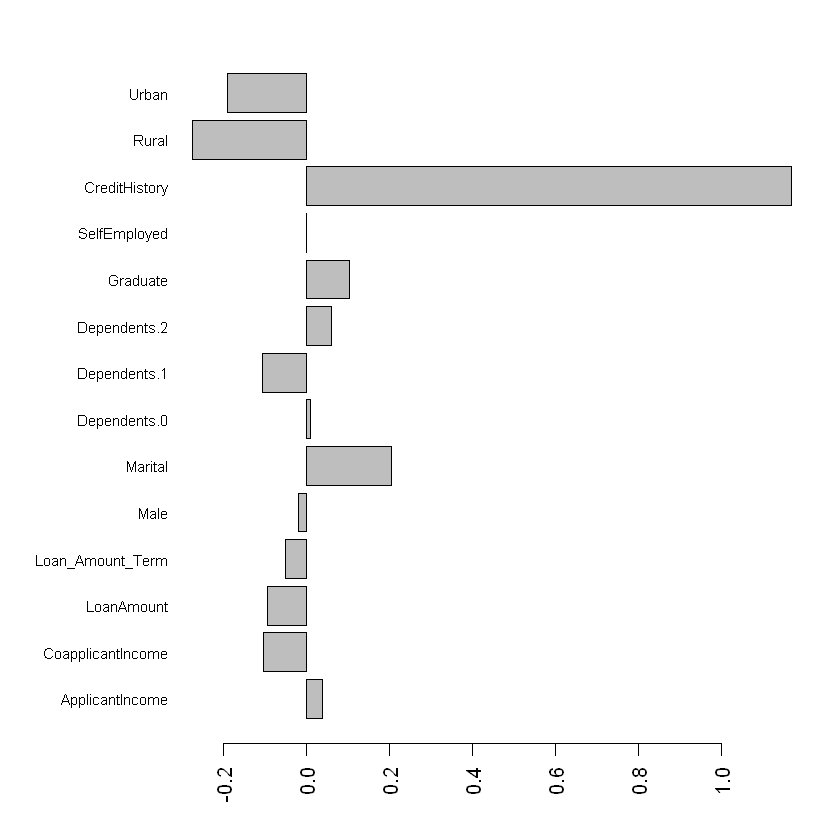

In [159]:
par(mar=c(4,8,2,2))
barplot(coef(lda$finalModel)[,1],horiz=TRUE,las=2,cex.names=0.75)

The final model coefficients are consistent with the observations made during preliminary data visualization. The credit history has the largest influence on the loan approval.

In [160]:
predictTrain <- predict(lda,preprocessedX)
confusionMatrix(predictTrain, df[,13],positive='Y')

Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N  85  10
         Y 107 412
                                          
               Accuracy : 0.8094          
                 95% CI : (0.7761, 0.8398)
    No Information Rate : 0.6873          
    P-Value [Acc > NIR] : 6.062e-12       
                                          
                  Kappa : 0.4859          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9763          
            Specificity : 0.4427          
         Pos Pred Value : 0.7938          
         Neg Pred Value : 0.8947          
             Prevalence : 0.6873          
         Detection Rate : 0.6710          
   Detection Prevalence : 0.8453          
      Balanced Accuracy : 0.7095          
                                          
       'Positive' Class : Y               
                                          

The accuracy is similar to the accuracy from cross validation, therefore the model is not overfitted.

Because the data is unbalanced, (most of the loans were approved), there are more false positives than false negatives. The model will tend to predict more loans being approved than actually are approved. However, the false positive rate is still much higher than the false negative rate, indicating there may be some other problem with the model.

Normality is an assumption of LDA. The Box Cox transformation may be performed to improve the LDA model.

In [239]:
processparameters2 <-preProcess(X,method =c('scale','bagImpute','BoxCox'))
preprocessedX2 <-predict(processparameters2,X)
lda<-train(preprocessedX2, df[,13],method='lda',trControl=trainControl(method='repeatedcv',number=5,repeats=3))
lda
predictTrain <- predict(lda,preprocessedX2)
confusionMatrix(predictTrain, df[,13],positive='Y')

Linear Discriminant Analysis 

614 samples
 14 predictor
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 491, 491, 491, 491, 492, 492, ... 
Resampling results:

  Accuracy   Kappa    
  0.8121314  0.4901704


Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N  86   9
         Y 106 413
                                          
               Accuracy : 0.8127          
                 95% CI : (0.7796, 0.8428)
    No Information Rate : 0.6873          
    P-Value [Acc > NIR] : 1.565e-12       
                                          
                  Kappa : 0.4947          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9787          
            Specificity : 0.4479          
         Pos Pred Value : 0.7958          
         Neg Pred Value : 0.9053          
             Prevalence : 0.6873          
         Detection Rate : 0.6726          
   Detection Prevalence : 0.8453          
      Balanced Accuracy : 0.7133          
                                          
       'Positive' Class : Y               
                                          

Now the performance of the LDA model is comparable if not slightly better than that of the other models. Because of its simplicity and lower tendency to overfit, the LDA model will be chosen as the final model.

Note that the number of false positives is still very high. This may be partially due to imbalance, as mentioned before. However, it is likely mostly due to the nature of the data itself because the results for kNN (which is not sensitive to class imbalance) are even worse than the LDA model, in terms of Cohen's kappa. This indicates that modeling based on neighbors leads to predictions that are not much more accurate compared to random assignment, which implies that samples that are close to each other in feature space may belong to a different class. It suggests the nature of loan approval is subjective, and that similar people may be approved or denied arbitrarily. Because there are more false positives, it suggests that some may have biases against certain groups of people that causes them to deny loans that otherwise would be approved in the majority of cases. Overall, since it seems the low specificity is not mainly due to imbalance, no oversampling or subsampling will be performed to balance the data, and the current LDA model will be used as is.

The test data set is pre-processed and the prediction is generated below. 

In [240]:
test <- read.csv('C:/Datasets/LoanTest.csv',na.strings='')
test$Credit_History<-as.factor(test$Credit_History)
summary(test)
test$Loan_Status <- 0
testX <- createdummy(test)
preprocessedtestX <-predict(processparameters2,testX)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001015:  1   Female: 70   No :134   0   :200   Graduate    :283  
 LP001022:  1   Male  :286   Yes:233   1   : 58   Not Graduate: 84  
 LP001031:  1   NA's  : 11             2   : 59                     
 LP001035:  1                          3+  : 40                     
 LP001051:  1                          NA's: 10                     
 LP001054:  1                                                       
 (Other) :361                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :307      Min.   :    0   Min.   :    0     Min.   : 28.0  
 Yes : 37      1st Qu.: 2864   1st Qu.:    0     1st Qu.:100.2  
 NA's: 23      Median : 3786   Median : 1025     Median :125.0  
               Mean   : 4806   Mean   : 1570     Mean   :136.1  
               3rd Qu.: 5060   3rd Qu.: 2430     3rd Qu.:158.0  
               Max.   :72529   Max.   :24000     Max.   :5

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Loan_Status' is not a factor"Warning message in predict.BoxCoxTrans(object$bc[[i]], newdata[, i]):
"newdata should have values > 0"

In [241]:
results <- data.frame(test[,1],predict(lda,preprocessedtestX))